# Glider data worflow from raw

****

## Change the working directory and move some files
There is a deployment yml metadata file template and a sensor txt list template that will be copied in the glider raw data directory and that need to be manually filled in.

In [1]:
#Simply change the working directory to the project directory

import os
import shutil

current_dir = os.getcwd()
parent_parent_dir = os.path.dirname(current_dir)
os.chdir(parent_parent_dir)

# Now the working directory is set to the project directory
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\db_building


****

## Creation of the yaml file for metadata

In [3]:
#copy the deployment yaml file templte to my raw glider folder
source_file = 'data/glider/raw/deployment.yml'
destination_dir = 'data/glider/pomBODCREQ-5915/unit_345/deployment_345.yml'

shutil.copy(source_file, destination_dir)

'data/glider/pomBODCREQ-5915/unit_345/deployment_345.yml'

**Open the yaml file and edit it manually with metadat from the glider deployment**

****

## Edition of sensors filter list

In [4]:
#Copy the sensor list template
source_file = 'data/glider/filipa_txt/biocarbon_glider_standard_sensors.txt'
destination_dir = 'data/glider/pomBODCREQ-5915/unit_345/sensors_template.txt'

shutil.copy(source_file, destination_dir)

'data/glider/pomBODCREQ-5915/unit_345/sensors_template.txt'

**Open the txt file and modify it maunaully**

****

## Moving EBD and DBD into the same folder

It's chat gpt code

In [ ]:
from tqdm import tqdm
# Define source directories for .EBD and .DBD files
source_dir_ebd = "data/glider/pomBODCREQ-5915/unit_345/SB/LOGS"
source_dir_dbd = "data/glider/pomBODCREQ-5915/unit_345/MB/LOGS"

# Define the destination directory
destination_dir = "data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries"

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Function to copy files with a specific extension
def copy_files_with_extension(source_dir, extension, dest_dir):
    for file_name in tqdm(os.listdir(source_dir)):
        if file_name.endswith(extension):
            full_file_path = os.path.join(source_dir, file_name)
            if os.path.isfile(full_file_path):
                shutil.copy(full_file_path, dest_dir)

# Copy .EBD files
copy_files_with_extension(source_dir_ebd, ".EBD", destination_dir)

# Copy .DBD files
copy_files_with_extension(source_dir_dbd, ".DBD", destination_dir)

print("All files copied successfully.")


Copied 05260002.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05270000.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05280000.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05290000.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05300000.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05310000.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05320000.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05330000.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05330001.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05330002.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05330003.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05330004.EBD to data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries
Copied 05330005.EBD to data/glider/pomBODCREQ-5915/unit_345/pygl

## Try to run process_deploymentRealtime

INFO:pyglider.slocum:data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries/*.[D|E]BD
INFO:pyglider.slocum:working on latitude
INFO:pyglider.slocum:names: latitude m_lat
INFO:pyglider.slocum:working on longitude
INFO:pyglider.slocum:names: longitude m_lon
INFO:pyglider.slocum:working on heading
INFO:pyglider.slocum:names: heading m_heading
INFO:pyglider.slocum:working on pitch
INFO:pyglider.slocum:names: pitch m_pitch
INFO:pyglider.slocum:working on roll
INFO:pyglider.slocum:names: roll m_roll
INFO:pyglider.slocum:working on waypoint_latitude
INFO:pyglider.slocum:names: waypoint_latitude c_wpt_lat
INFO:pyglider.slocum:working on waypoint_longitude
INFO:pyglider.slocum:names: waypoint_longitude c_wpt_lon
INFO:pyglider.slocum:working on conductivity
INFO:pyglider.slocum:names: conductivity sci_water_cond
INFO:pyglider.slocum:working on temperature
INFO:pyglider.slocum:names: temperature sci_water_temp
INFO:pyglider.slocum:working on pressure
INFO:pyglider.slocum:names: pressure sci_water

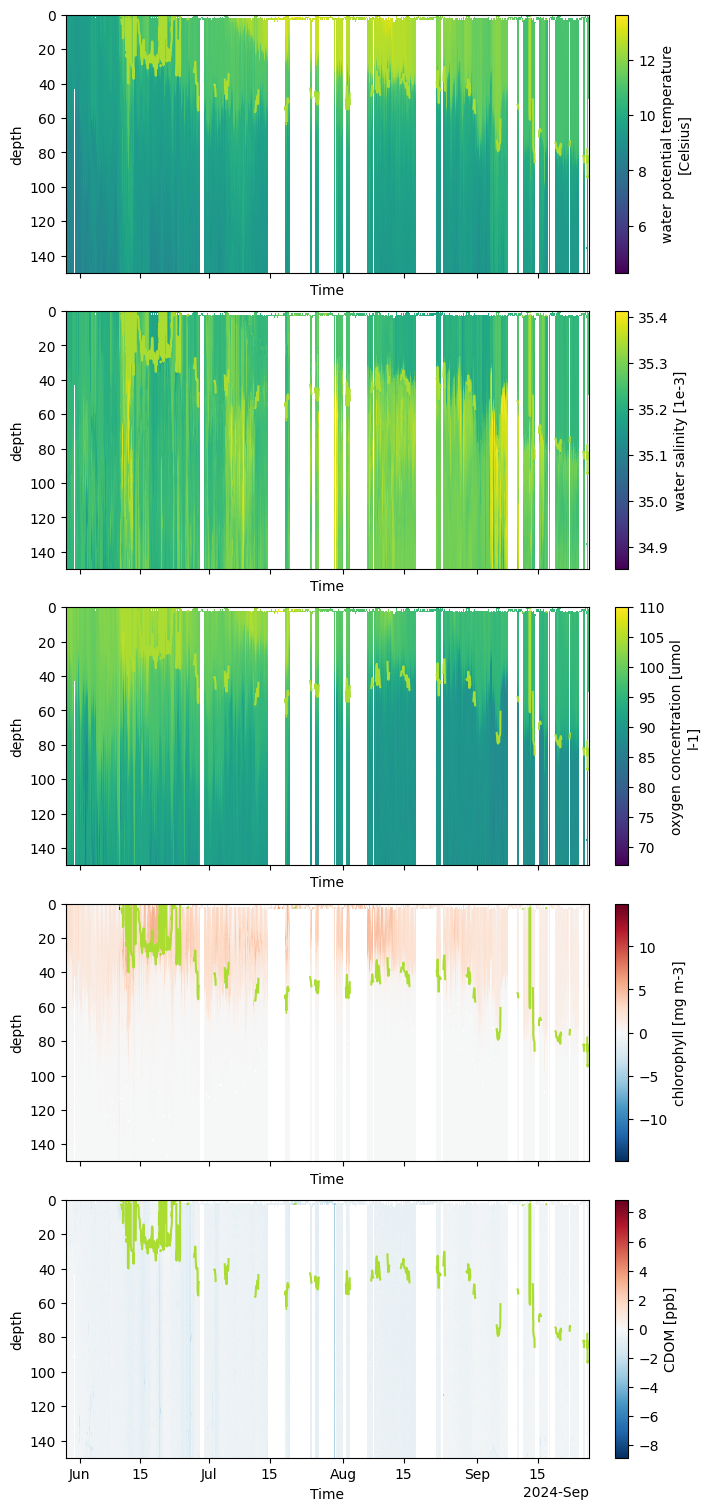

In [9]:
import logging
import pyglider.ncprocess as ncprocess
import pyglider.slocum as slocum
import pyglider.utils as pgutils
import dbdreader

logging.basicConfig(level='INFO')

binarydir = 'data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries'
ncdir = 'data/glider/pomBODCREQ-5915/unit_345/nc_files/'
cacdir = 'data/glider/pomBODCREQ-5915/unit_345/BODC_listings/sci/cache/'
sensorlist = 'data/glider/pomBODCREQ-5915/unit_345/sensors_list_345.txt'
deploymentyaml = 'data/glider/pomBODCREQ-5915/unit_345/deployment_345.yml'
l1tsdir = ncdir + 'L0-timeseries/'
profiledir = ncdir + 'L0-profiles/'
griddir = ncdir + 'L0-gridfiles/'
scisuffix = 'ebd'
glidersuffix = 'dbd'
rawdir = 'data/glider/pomBODCREQ-5915/unit_345/rawnc/'

do_direct = True
# only do this for a real run, or something like this
real = False
if real:
    os.system('rsync -av cproof@sfmc.webbresearch.com:/var/opt/sfmc-dockserver/' +
              'stations/dfo/gliders/ ~/gliderdata/slocum_dockserver/')
    os.system('rsync -av ~/gliderdata/slocum_dockserver/rosie_713/from-glider/* ' +
              binarydir)

    os.system('rm ' + rawdir + 'dfo* ' + rawdir + 'TEMP*.nc ' + l1tsdir + '* ' +
              profiledir + '* ' + griddir + '* ')

if do_direct:
    # turn *.sdb and *.tbd into timeseries netcdf files
    outname = slocum.binary_to_timeseries(
        binarydir, cacdir, l1tsdir, deploymentyaml, search='*.[D|E]BD',
        profile_filt_time=20, profile_min_time=20)
else:
    # turn *.EBD and *.DBD into *.ebd.nc and *.dbd.nc netcdf files.
    slocum.binary_to_rawnc(
        binarydir, rawdir, cacdir, sensorlist, deploymentyaml,
        incremental=True, scisuffix=scisuffix, glidersuffix=glidersuffix)

    # merge individual neetcdf files into single netcdf files *.ebd.nc and *.dbd.nc
    slocum.merge_rawnc(
        rawdir, rawdir, deploymentyaml,
        scisuffix=scisuffix, glidersuffix=glidersuffix)

    # Make level-1 timeseries netcdf file from th raw files...
    outname = slocum.raw_to_timeseries(
        rawdir, l1tsdir, deploymentyaml,
        profile_filt_time=100, profile_min_time=300)

if False:
    # make profile netcdf files for ioos gdac...
    ncprocess.extract_timeseries_profiles(outname, profiledir, deploymentyaml)

# make grid of dataset....

outname2 = ncprocess.make_gridfiles(outname, griddir, deploymentyaml)
pgutils.example_gridplot(outname2, './gridplot2.png', ylim=[150, 0],
                         toplot=['potential_temperature', 'salinity',
                                 'oxygen_concentration', 'chlorophyll', 'cdom'])

In [11]:
import xarray as xr

In [13]:
dat = xr.open_dataset('data/glider/pomBODCREQ-5915/unit_345/nc_files/L0-timeseries/dfo-maria997-20220614.nc')

In [14]:
display(dat)

<xarray.Dataset> Size: 583MB
Dimensions:                (time: 3168095)
Coordinates:
  * time                   (time) datetime64[ns] 25MB 2024-05-14T13:50:54 ......
    latitude               (time) float64 25MB ...
    longitude              (time) float64 25MB ...
    depth                  (time) float64 25MB ...
Data variables: (12/19)
    heading                (time) float64 25MB ...
    pitch                  (time) float64 25MB ...
    roll                   (time) float64 25MB ...
    waypoint_latitude      (time) float64 25MB ...
    waypoint_longitude     (time) float64 25MB ...
    conductivity           (time) float64 25MB ...
    ...                     ...
    salinity               (time) float64 25MB ...
    potential_density      (time) float64 25MB ...
    density                (time) float64 25MB ...
    potential_temperature  (time) float64 25MB ...
    profile_index          (time) float64 25MB ...
    profile_direction      (time) float64 25MB ...
Attributes: (12/65)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgement:           Funding from Fisheries and Oceans Canada, Cana...
    cdm_data_type:             Trajectory
    comment:                   Saanich Inlet test deployment
    contributor_name:          James Pegg, Tetjana Ross, Jody Klymak, Hayley ...
    ...                        ...
    summary:                   Saanich Inlet.
    time_coverage_end:         2024-10-29T11:00:16.000000000
    time_coverage_start:       2024-05-14T13:50:54.000000000
    title:                     dfo-maria997-20240514T1350
    transmission_system:       IRIDIUM
    wmo_id:                    9999999

In [18]:
grouped_dat = dat.groupby('profile_index')

In [ ]:
grouped_dat[165]['CH']

<xarray.Dataset> Size: 813kB
Dimensions:                (time: 4416)
Coordinates:
  * time                   (time) datetime64[ns] 35kB 2024-06-15T13:16:42 ......
    latitude               (time) float64 35kB ...
    longitude              (time) float64 35kB ...
    depth                  (time) float64 35kB ...
Data variables: (12/19)
    heading                (time) float64 35kB ...
    pitch                  (time) float64 35kB ...
    roll                   (time) float64 35kB ...
    waypoint_latitude      (time) float64 35kB ...
    waypoint_longitude     (time) float64 35kB ...
    conductivity           (time) float64 35kB ...
    ...                     ...
    salinity               (time) float64 35kB ...
    potential_density      (time) float64 35kB ...
    density                (time) float64 35kB ...
    potential_temperature  (time) float64 35kB ...
    profile_index          (time) float64 35kB 165.0 165.0 165.0 ... 165.0 165.0
    profile_direction      (time) float64 35kB ...
Attributes: (12/65)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgement:           Funding from Fisheries and Oceans Canada, Cana...
    cdm_data_type:             Trajectory
    comment:                   Saanich Inlet test deployment
    contributor_name:          James Pegg, Tetjana Ross, Jody Klymak, Hayley ...
    ...                        ...
    summary:                   Saanich Inlet.
    time_coverage_end:         2024-10-29T11:00:16.000000000
    time_coverage_start:       2024-05-14T13:50:54.000000000
    title:                     dfo-maria997-20240514T1350
    transmission_system:       IRIDIUM
    wmo_id:                    9999999

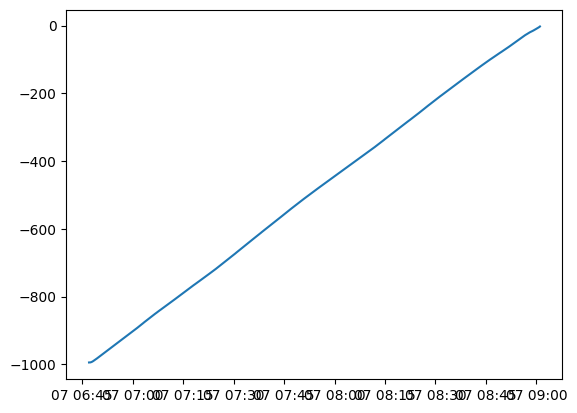

In [30]:
chl = grouped_dat[900]['chlorophyll'].values
pres = grouped_dat[900]['pressure'].values
time = grouped_dat[900].time
import matplotlib.pyplot as plt
#chl = interp_nan(chl)
#pres = interp_nan(pres)

#Simple plot
plt.plot(time, -pres)
plt.show() 